In [1]:
from pymysql import Connect
import pandas as pd
import pyodbc, psycopg2

db_conn = psycopg2.connect(database="depdatabase", user="postgres", password="DaddySzymon123", host="vichogent.be", port="40033")

cursor = db_conn.cursor()

cursor.execute(f"""
select * from view_machine_learning_data
""")

df = pd.DataFrame(cursor.fetchall(), columns=['ondernemingsnummer', 'urban','balanstotaal','omzet', 'personeelsbestanden', 'foundingdate', 'environment','social','governance', 'general'])

In [2]:
df.head()

,ondernemingsnummer,urban,balanstotaal,omzet,personeelsbestanden,foundingdate,environment,social,governance,general
0,410917437,0.0,None,None,NaN,1961-03-30,0.0,0.018586,0.029217,0.015934
1,461056836,1.875,2805793.44,0,10.0,1997-07-07,0.0,0.000000,0.710802,0.236934
2,219395192,0.8490566037735849,None,None,NaN,1979-02-13,0.0,0.000000,0.633410,0.211137
3,447763183,1.4137931034482758,478133071.39,2438500.28,10.0,1992-06-30,0.0,0.000000,0.715486,0.238495
4,432406994,0.6572222,39999869.6,65496051.3,45.0,1987-11-10,0.0,0.000000,0.795257,0.265086


In [3]:
df = df.dropna()

In [4]:
len(df)

8678

In [5]:
df.head()

,ondernemingsnummer,urban,balanstotaal,omzet,personeelsbestanden,foundingdate,environment,social,governance,general
1,461056836,1.875,2805793.44,0,10.0,1997-07-07,0.0,0.000000,0.710802,0.236934
3,447763183,1.4137931034482758,478133071.39,2438500.28,10.0,1992-06-30,0.0,0.000000,0.715486,0.238495
4,432406994,0.6572222,39999869.6,65496051.3,45.0,1987-11-10,0.0,0.000000,0.795257,0.265086
5,417609051,0.7692307692307693,26922177.69,50191983.53,66.0,1977-10-13,0.0,0.018586,0.000000,0.006195
6,432893182,0.2121212121212121,25955521,43827278,18.0,1988-01-04,0.0,0.000000,0.044086,0.014695


In [6]:
df['omzet'] = df['omzet'].astype('int64')
df['balanstotaal'] = df['balanstotaal'].astype('int64')
df['personeelsbestanden'] = df['personeelsbestanden'].astype('int64')
df['urban'] = df['urban'].astype('float64')
df['foundingdate'] = (pd.Timestamp.now() - pd.to_datetime(df['foundingdate'], format="%Y-%m-%d")).dt.days / 365
df['environment'] = df['environment'].astype('float64')
df['social'] = df['social'].astype('float64')
df['governance'] = df['governance'].astype('float64')
df['general'] = df['general'].astype('float64')

In [7]:
df['environment'] = df['environment'] * 100
df['social'] = df['social'] * 100
df['governance'] = df['governance'] * 100
df['general'] = df['general'] * 100

In [8]:
df.dtypes

ondernemingsnummer       int64
urban                  float64
balanstotaal             int64
omzet                    int64
personeelsbestanden      int64
foundingdate           float64
environment            float64
social                 float64
governance             float64
general                float64
dtype: object

In [9]:
len(df)

8678

In [10]:
numerical_ix = df.select_dtypes(include=['int32','int64','float64']).columns

for col in numerical_ix:
        print("capping",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.20,0.80]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]



capping ondernemingsnummer
capping urban
capping balanstotaal
capping omzet
capping personeelsbestanden
capping foundingdate
capping environment
capping social
capping governance
capping general


C:\Users\dylan\AppData\Local\Temp\ipykernel_16032\4078108386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\dylan\AppData\Local\Temp\ipykernel_16032\4078108386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\dylan\AppData\Local\Temp\ipykernel_16032\4078108386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [11]:
df.head()

,ondernemingsnummer,urban,balanstotaal,omzet,personeelsbestanden,foundingdate,environment,social,governance,general
1,461056836.0,1.443299,2850100.0,0.0,11,25.468493,1.813992,13.262954,71.080217,23.693406
3,447763183.0,1.413793,14182106.8,2438500.0,11,30.490411,1.813992,13.262954,71.548584,23.849528
4,432406994.0,0.657222,14182106.8,17442096.6,43,35.131507,1.813992,13.262954,79.525686,26.508562
5,417691699.2,0.769231,14182106.8,17442096.6,43,45.100822,1.813992,13.262954,19.656531,16.722425
6,432893182.0,0.514286,14182106.8,17442096.6,18,34.980822,1.813992,13.262954,19.656531,16.722425


In [12]:
len(df)

8678

<AxesSubplot: xlabel='balanstotaal'>

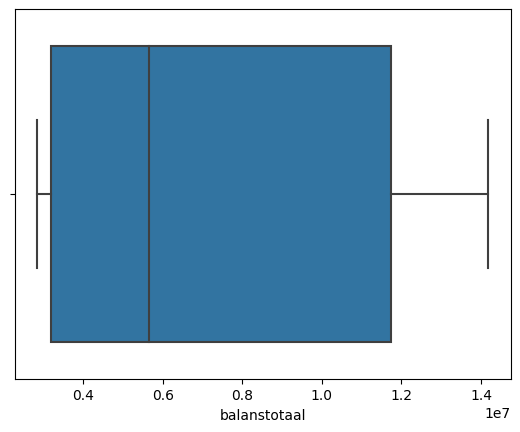

In [13]:
import seaborn as sns
sns.boxplot(data=df, x='balanstotaal')

<AxesSubplot: xlabel='omzet'>

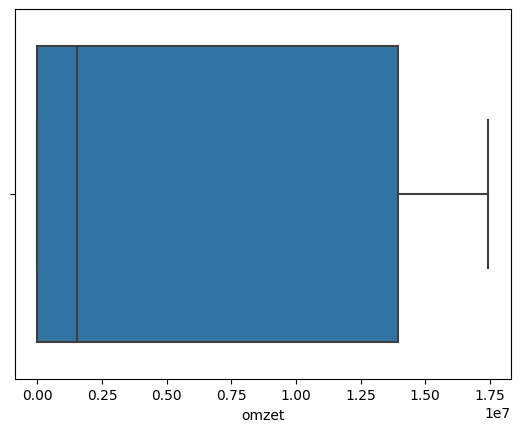

In [14]:
sns.boxplot(data=df, x='omzet')

<AxesSubplot: xlabel='personeelsbestanden'>

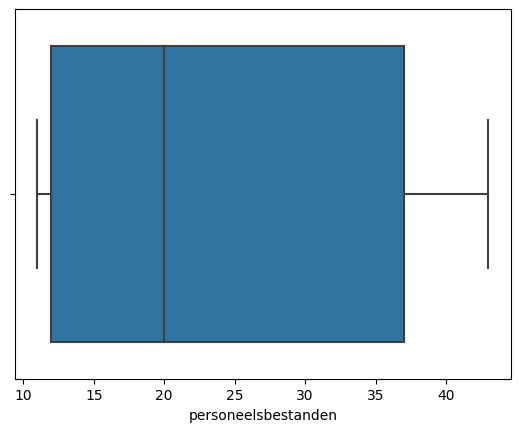

In [15]:
sns.boxplot(data=df, x='personeelsbestanden')

In [16]:
X = df.drop(['general', 'environment','social','governance', 'ondernemingsnummer'], axis=1)
y = df['general']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

numerical_ix = X.select_dtypes(include=['int32','int64','float64']).columns

col_transform = ColumnTransformer(transformers=[
    ('minmax',MinMaxScaler(), numerical_ix),
])

In [18]:
df['general'].value_counts(bins=10)

(16.666999999999998, 22.132]    2790
(65.408, 70.818]                2038
(38.36, 43.77]                   717
(43.77, 49.179]                  620
(22.132, 27.541]                 541
(32.951, 38.36]                  540
(49.179, 54.589]                 474
(54.589, 59.999]                 382
(27.541, 32.951]                 307
(59.999, 65.408]                 269
Name: general, dtype: int64

<AxesSubplot: xlabel='general', ylabel='Count'>

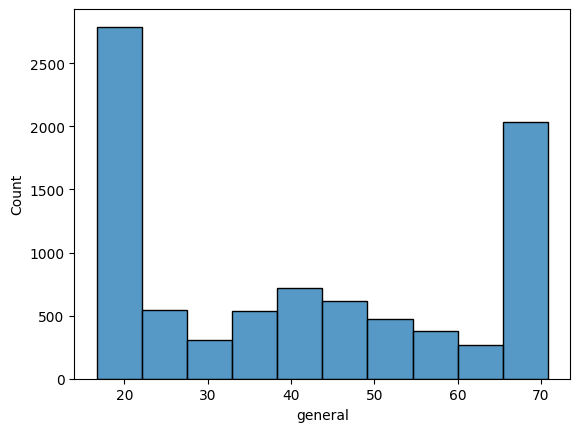

In [19]:
import seaborn as sns
sns.histplot(data=df, x='general', bins=10)

In [20]:
under_30 = df[df['general'] < 30]
under_30 = under_30.sample(n=500)
middle = df[(df['general'] >= 30) & (df['general'] <= 65)]
above_65 = df[df['general'] > 65]
above_65 = above_65.sample(n=500)

In [21]:
print(len(under_30), len(middle), len(above_65))

500 3162 500


In [22]:
df = pd.concat([under_30, middle, above_65])

<AxesSubplot: xlabel='general', ylabel='Count'>

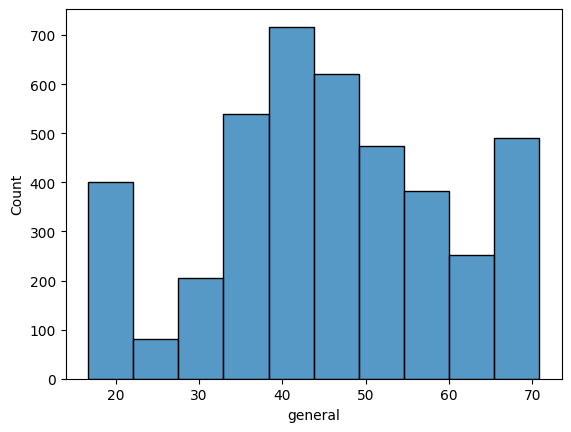

In [23]:
sns.histplot(data=df, x='general', bins=10)

In [24]:
X

,urban,balanstotaal,omzet,personeelsbestanden,foundingdate
1,1.443299,2850100.0,0.0,11,25.468493
3,1.413793,14182106.8,2438500.0,11,30.490411
4,0.657222,14182106.8,17442096.6,43,35.131507
5,0.769231,14182106.8,17442096.6,43,45.100822
6,0.514286,14182106.8,17442096.6,18,34.980822
...,...,...,...,...,...
12625,1.442786,14182106.8,17442096.6,43,43.994521
12627,0.819672,6665510.0,17442096.6,20,41.923288
12628,0.849057,14182106.8,9373091.0,43,45.100822
12629,1.283019,14182106.8,0.0,13,45.100822


In [24]:
X = df.drop(['general', 'environment','social','governance', 'ondernemingsnummer'], axis=1)
y = df['general']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the pipeline
pipeline = Pipeline([
    ('minmaxscaler', MinMaxScaler()),
    ('gridsearch', GridSearchCV(estimator = RandomForestRegressor(), 
        param_grid = param_grid, scoring='neg_mean_squared_error', 
        cv = 3, n_jobs = -1, verbose = 2))
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

# Print the best parameters and the best score
print(pipeline.named_steps['gridsearch'].best_params_)
print(pipeline.named_steps['gridsearch'].best_score_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
0.12521497056666184


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MSE: 199.67043076644708
MAE: 11.418227114626735


In [30]:
import pickle
with open("rfr-general-score.pkl", "wb") as f:
    pickle.dump(pipeline, f)

array([37.27128748, 42.88275887, 46.25698274, ..., 41.76596391,
       45.007138  , 46.9660528 ])